In [2]:
%matplotlib inline

In [2]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd

import os
from os import path 
from time import time
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "TRAS.settings")
import django
from django.core.exceptions import ObjectDoesNotExist
django.setup()
from django.db import transaction
from django.conf import settings

from proto.models import Attraction

Automatically created module for IPython interactive environment


In [17]:
path = 'C:/Users/taehee/Documents/GitHub/tripReviewAnalysisSystem/크롤러-전처리/주소/'
file_names_list = os.listdir(path)
lati_long_tuple_list = []
for file_name in file_names_list:
    if file_name.startswith('lati_long'):
        data_df = pd.read_csv(path+ file_name, engine = 'python', index_col = 0, encoding = 'utf-8')
        
        for string_data in list(data_df.iloc[:,1].values):
            data_list = [float(value) for value in string_data[1:-2].split(', ') if value != 'na']
            lati_long_tuple_list.append(data_list)    
        

In [19]:
lati_long_tuple_list[:5]

[['Gyeongbokgung Palace', '(37.5773616, 126.9766844)'],
 ['Bukhansan National Park', '(37.612085, 127.008251)'],
 ['Myeongdong Shopping Street', '(37.5640907, 126.9979403)'],
 ['Changdeokgung Palace', '(37.5800952, 126.9918496)'],
 ['The War Memorial of Korea', '(37.5362151, 126.9777629)']]

In [21]:
nan_list = [block for block in lati_long_tuple_list if not block[1].startswith('(37.')]
print(nan_list)

[['Dream Forest', '(nan, nan)'], ['Noryangjin Fisheries Wholesale Market', '(nan, nan)']]


In [59]:
lati_long_list = lati_long_tuple_list[:49] +lati_long_tuple_list[51:86] + lati_long_tuple_list[88:]
lati_long_list[:10]

[[37.5773616, 126.976684],
 [37.612085, 127.00825],
 [37.5640907, 126.99794],
 [37.5800952, 126.991849],
 [37.5362151, 126.977762],
 [37.5246635, 126.977727],
 [37.5716555, 126.986232],
 [37.5534532, 126.921683],
 [37.5129907, 127.102732],
 [37.566535, 126.977969]]

In [96]:
# weight = 평균 별점
#n_clusters = ??
# 밀집된 곳 좁게 설정... 넓게넓게 잡아줘도 괜찮을
lati_long_datas = np.array(lati_long_list)

x = lati_long_datas[:,0]
y = lati_long_datas[:,1]
x_min = min(x)
y_min = min(y)
x_max = max(x)
y_max = max(y)
color_dict = {0:'tab:red',
             1:'tab:orange',
             2:'tab:olive',
             3:'tab:green',
             4:'tab:cyan',
             5:'tab:gray',
             6:'tab:purple',
             7:'b'}
image_seoul = mpimg.imread('seoul.png')

In [87]:
print(x_min, x_max)
print(y_min, y_max)

37.4712172 37.612085
126.826685 127.11652


In [103]:
def kmeans_show(lati_long_datas, n_clusters):

    kmeans = KMeans(init='k-means++',n_clusters =n_clusters, n_init=10, random_state = 8)

    kmeans.fit(lati_long_datas)

    # Put the result into a color plot
    Z = kmeans.predict(np.c_[x.ravel(), y.ravel()])

    plt.figure(1)
    plt.clf()
    
    plt.imshow(image_seoul, extent=[x_min, x_max, y_min, y_max], aspect='auto')

    plt.scatter(x,y,c = [color_dict[z] for z in Z])
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='k', zorder=10)
    plt.title("K-means clustering on Seoul's attractions")

    # 서울 사진 올려보자.

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.grid(color='gray', linestyle='--')
    plt.show()

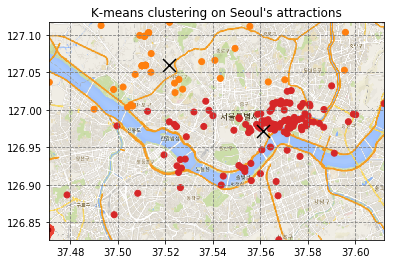

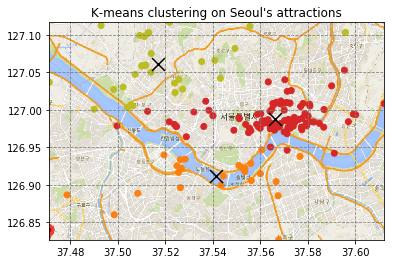

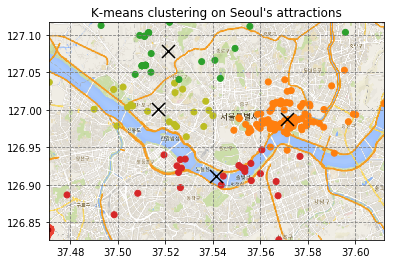

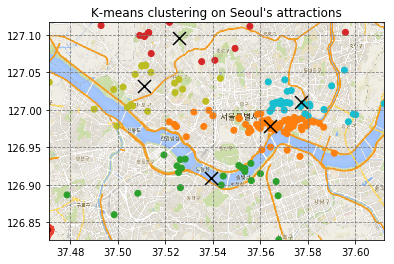

In [104]:
for n in range(2,5+1):
    kmeans_show(lati_long_datas, n)

In [ ]:
# 지하철 환승역들의 주소
# [(x,y), ...]
가장 가까운 지하철 환승역을 찾아주는 친구를 만들자!

거리계산
sorting
1등인 친구
점으로 표현을 하면...?